In [120]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

setaN = 5
X = np.asarray([1]*len(pointX))
X = np.append(np.append(X, pointX), pointY)
X = np.append(np.append(X, pointX ** (2)), pointY ** (2))

X = np.reshape(X, (setaN, len(pointX)))

In [128]:
seta = np.asarray([0.1] * setaN)
np.reshape(seta, (setaN, 1))
err_list = []
accuracy_list = []
lr = 0.002
epochs = 5000000
A = None
M = len(pointX)

for i in range(epochs):
    #forpass
    Z = np.dot(seta, X)
    A = 1/(1+np.exp(-Z))
    ERR = -(label-A)
    
    #backprop
    for k in range(setaN):
        seta[k] -= lr * np.sum(ERR * X[k]) / M
    
    #history
    accuracy_list.append(np.mean((A >0.5) ==  label))
    A = np.clip(A, 1e-10, 1-1e-10)
    
    loss = np.sum(-(label*np.log(A) + (1-label)*np.log(1-A)))/M
    err_list.append(loss)

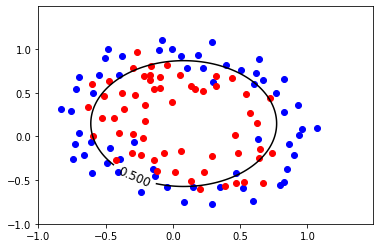

In [118]:
fig = plt.figure()
ax = fig.add_subplot(111)

xs = np.arange(-1, 1.5, 0.01)
ys = np.arange(-1, 1.5, 0.01)
xx,yy = np.meshgrid(xs, ys)
Z2 = seta[0] + seta[1] * xx + seta[2] * yy + seta[3] * xx**2 + seta[4] * yy**2
A2 = 1/(1+np.exp(-Z2))
cp = ax.contour(xx, yy, A2, 1, colors=colours)
ax.clabel(cp, fontsize=12, colors=colours)
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.show()

In [119]:
seta

array([ 3.81164602,  1.35847912,  2.29942285, -8.45116432, -7.77858154])

# RESULT

## 1. Plot the training data

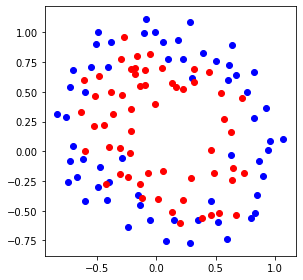

In [121]:
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## 2. Write down the high dimensional function g(x, y, $\theta$)

$$g(x, y, \theta) = \theta_0 + \theta_1 x + \theta_2 y + \theta_3 x^2 + \theta_4 y^2 $$

## 3. Plot the training error

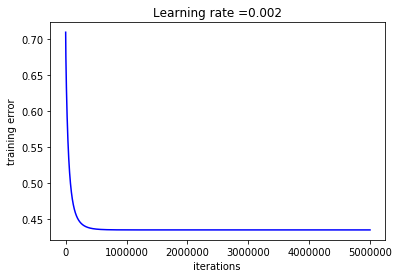

In [117]:
plt.plot(np.squeeze(err_list), color='b')
plt.ylabel('training error')
plt.xlabel('iterations ')
plt.title("Learning rate =" + str(lr))
plt.show()

## 4. Plot the training accuracy

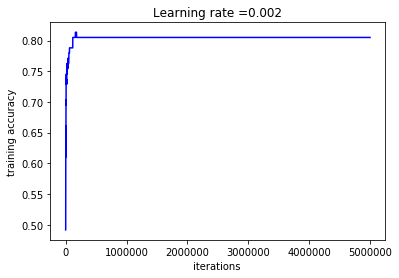

In [129]:
plt.plot(np.squeeze(accuracy_list), color='b')
plt.ylabel('training accuracy')
plt.xlabel('iterations ')
plt.title("Learning rate =" + str(lr))
plt.show()

## 5. Write down the final training accuracy

In [116]:
correct = 0
for i, a in enumerate(A):
    if a <= 0.5 and label[i] == 0 :
        correct += 1
    elif a > 0.5 and label[i] == 1:
        correct += 1

print(str(correct / len(A) * 100) + '%')

80.50847457627118%


## 6. Plot the optimal classifier superimposed on the training data